In [1]:
import subprocess

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from tqdm.notebook import trange

In [2]:
plt.style.use('seaborn-v0_8')
plt.rcParams.update({'font.size': 8})

In [11]:
N = 100
FILENAME = "prob1_ids.txt"
RANGE_ANALYSIS = 25

In [4]:
counts = {
    '1': [],
    '2': [],
    '3': [],
    '4': [],
    '5': [],
}

In [5]:
for _ in trange(N):
    result = subprocess.run(["mpirun", "-np", "6", "./prob1"], stdout=subprocess.PIPE)

    with open(FILENAME) as fp:
        d = fp.read().split()

    range_first = d[:RANGE_ANALYSIS]
    for k in counts.keys():
        counts[k].append(range_first.count(k))

  0%|          | 0/100 [00:00<?, ?it/s]

In [6]:
df_counts = pd.DataFrame(counts)

df_counts.head()

,1,2,3,4,5
0,7,5,5,4,4
1,5,4,6,5,5
2,6,7,4,4,4
3,1,6,6,6,6
4,5,5,5,5,5


In [7]:
df_plot = df_counts.melt(value_vars=['1', '2', '3', '4', '5'], value_name='count', var_name='ith_proc')
df_plot.head()

,ith_proc,count
0,1,7
1,1,5
2,1,6
3,1,1
4,1,5


Text(0.5, 1.0, 'Distribution of number of occurences of processes in top-25')

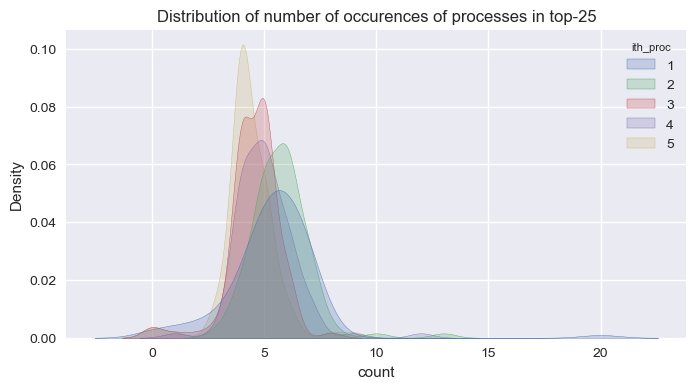

In [19]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
sns.kdeplot(df_plot, x='count', hue='ith_proc', fill=True, ax=ax)
# ax.set_title(f"Distribution of number of occurences in top-{RANGE_ANALYSIS} of 5  processes")

<Axes: >

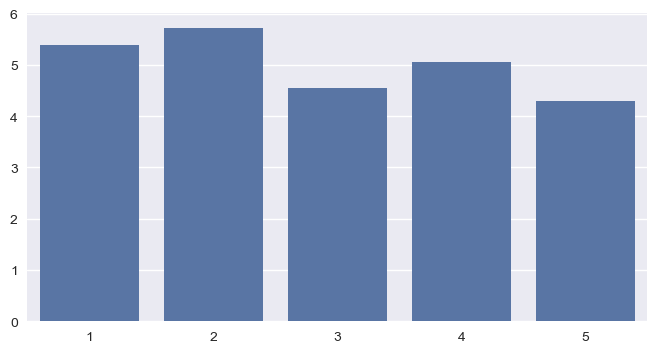

In [21]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
sns.barplot(df_counts.mean(), ax=ax)
# ax.set_title(f"Mean occurences of processes in top-{RANGE_ANALYSIS}")